
# 4.7: Use MPI backend for Parallelization

This example demonstrates how to use the MPI backend for
simulating dipoles using HNN-core.

The MPI backend allows running the simulation in parallel across neurons in the
network even with a single trial. For this, you will
need the 
[MPI related software](https://github.com/jonescompneurolab/hnn-core?tab=readme-ov-file#installation)
installed. Note that if you
want to simulate in parallel across trials, the Joblib backend allows this
without the need to install and configure MPI.


In [1]:
# Authors: Mainak Jas <mjas@mgh.harvard.edu>
#          Blake Caldwell <blake_caldwell@brown.edu>

Let us import `hnn_core`

In [2]:
import os.path as op

import matplotlib.pyplot as plt

import hnn_core
from hnn_core import simulate_dipole, jones_2009_model

--No graphics will be displayed.


Following our
[Alpha example](https://dylansdaniels.github.io/website_redesign/content/06_alpha_beta/api.html),
we add a
~10 Hz "bursty" drive starting at 50 ms and continuing to the end of the
simulation. Each burst consists of a pair (2) of spikes, spaced 10 ms apart.
The occurrence of each burst is jittered by a random, normally distributed
amount (20 ms standard deviation). We repeat the burst train 10 times, each
time with unique randomization.

In [3]:
net = jones_2009_model()

weights_ampa = {'L2_pyramidal': 5.4e-5, 'L5_pyramidal': 5.4e-5}
net.add_bursty_drive(
    'bursty', tstart=50., burst_rate=10, burst_std=20., numspikes=2,
    spike_isi=10, n_drive_cells=10, location='distal',
    weights_ampa=weights_ampa, event_seed=278)

Finally, to simulate we use the
[MPIBackend](https://jonescompneurolab.github.io/hnn-core/stable/generated/hnn_core.parallel_backends.MPIBackend.html#hnn_core.parallel_backends.MPIBackend)
class. This will
start the simulation across the number of processors (cores) specified by
`n_procs` using MPI. The `mpiexec` launcher is used from
`openmpi`, which must be installed on the system.

MPI will run 1 trial(s) sequentially by distributing network neurons over 2 processes.
/opt/anaconda3/envs/hc12/bin/nrniv:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/opt/anaconda3/envs/hc12/bin/nrniv:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
numprocs=2
Loading custom mechanism files from /Users/austinsoplata/rep/brn/hnn-core/hnn_core/mod/arm64/.libs/libnrnmech.so
Building the NEURON model
Loading custom mechanism files from /Users/austinsoplata/rep/brn/hnn-core/hnn_core/mod/arm64/.libs/libnrnmech.so
[Done]
Trial 1: 0.03 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial

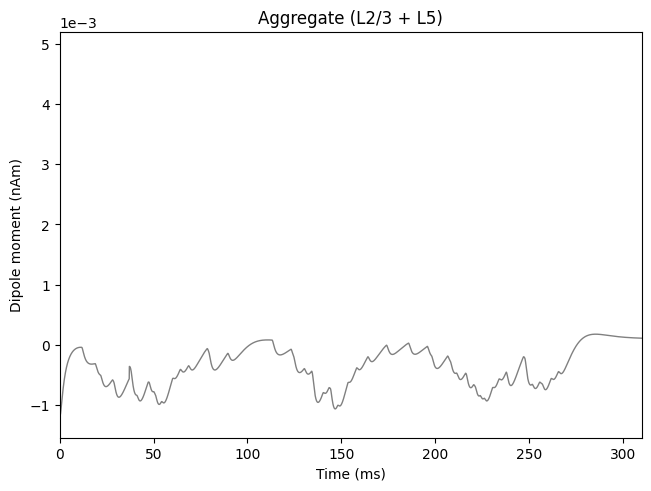

In [4]:
from hnn_core import MPIBackend

with MPIBackend(n_procs=2, mpi_cmd='mpiexec'):
    dpls = simulate_dipole(net, tstop=310., n_trials=1)

trial_idx = 0
dpls[trial_idx].plot(show=False)
plt.show()